In [1]:
import matplotlib.pyplot  as plt
import numpy              as np
from f_blind import f_blind

def autocorrelation(m_posterior):
	# Compute the mean
	mean = np.mean(m_posterior)
	
	# Compute the variance
	var = np.var(m_posterior)
	
	# Initialize the autocorrelation vector
	autocorr = np.correlate(m_posterior - mean, m_posterior - mean, mode='full')
	
	# Normalize the autocorrelation vector
	autocorr = autocorr[len(m_posterior)-1:] / ( var * np.arange(len(m_posterior), 0, -1))
	
	return autocorr

## 2B. Metropolis alfgorithm

In [2]:
N   = 10000
step = 10;
T=1;

x_cur    = np.random.rand()*100
f_cur    = f_blind(x_cur)

x_post = np.zeros((N))
i_acc = 0
for i in np.arange(N):
    x_pro    = x_cur + step*np.random.randn()*1
    f_pro    = f_blind(x_pro)
    
    P_acc    = (f_pro/f_cur)**(1/T)
    
    # accept with move probability P_acc
    if np.random.rand() < P_acc:
        i_acc = i_acc+1
    
        x_cur = x_pro
        f_cur = f_pro

    x_post[i] = x_cur


    
print('Accepted i_acc=%d of %d proposed models' % (i_acc,N))
print('Accept ratio =  %4.3f' % (i_acc/N))
N10=len(np.where(x_post<10)[0])
print('P(x>10)= %d/%d = %3.2f'%(N10,N,N10/N))

Accepted i_acc=5245 of 10000 proposed models
Accept ratio =  0.524
P(x>10)= 1576/10000 = 0.16


Text(0.5, 0, 'x')

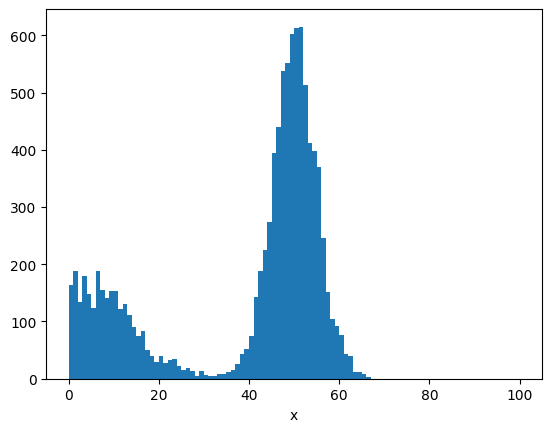

In [3]:
plt.hist(x_post, range=[0,100], bins=100)
plt.xlabel('x')

Text(0.5, 0, 'Number of accepted model')

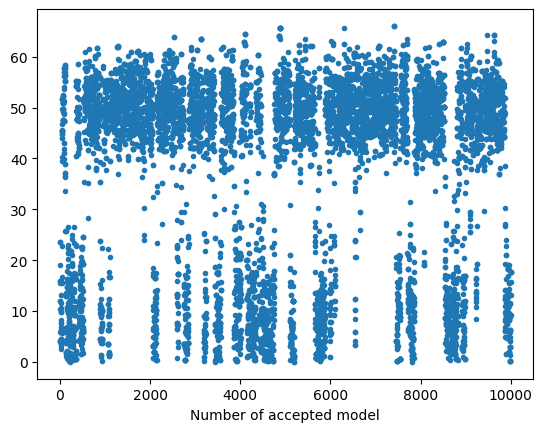

In [4]:
plt.plot(x_post,'.')
plt.xlabel('Number of accepted model')

Text(0, 0.5, 'Autocorrelation')

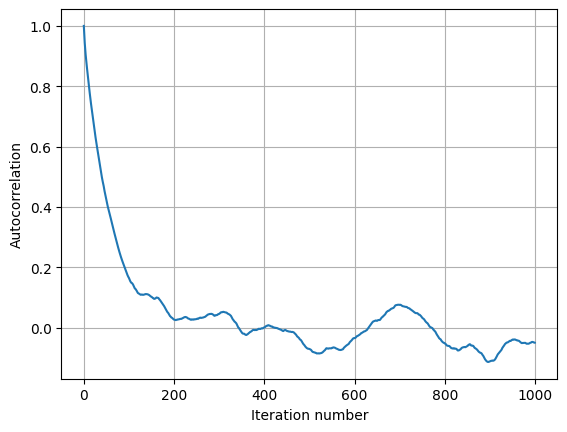

In [5]:
autocorr_x_acc = autocorrelation(np.array(x_post))
plt.plot(autocorr_x_acc[0:1000])
#plt.plot(autocorr_x_acc)
plt.grid()
plt.xlabel('Iteration number')
plt.ylabel('Autocorrelation')